### PCA : Proteins

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
sns.set(font_scale=2.8)

### Data

In [36]:
data = pd.read_csv('../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
ndf.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q8NEJ9,0.014413,0.000000,0.000000,0.000000,0.015874,0.0,0.000000,0.012219
P05556,0.000000,0.000000,0.008619,0.000000,0.021017,0.0,0.000000,0.000000
Q9BQE4,0.000000,0.000000,0.008653,0.000000,0.012493,0.0,0.000000,0.000000
P38435,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.007688
P28300,0.076751,0.020829,0.029480,0.050782,0.038154,0.0,0.015673,0.047586


In [37]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr = ['CM','ARR','CHD','VD','IHD','CCS','VOO','OHD']
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q8NEJ9,0.056961,0.00000,0.000000,0.000000,0.067632,0.0,0.000000,0.060571
P05556,0.000000,0.00000,0.029199,0.000000,0.089545,0.0,0.000000,0.000000
Q9BQE4,0.000000,0.00000,0.029315,0.000000,0.053229,0.0,0.000000,0.000000
P38435,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.038109
P28300,0.303324,0.10904,0.099876,0.361977,0.162557,0.0,0.100632,0.235891


### Add colors

In [38]:
tdata = ndf.copy(deep =True)

### PCA : Weights

In [39]:
def pca_results(good_data, pca,fname):
	#clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue',"red","blue"]

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (22,10))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar' );
	ax.set_ylabel("Feature Weights",fontsize =20)
	ax.set_xticklabels(dimensions, rotation=0, fontsize = 20)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev),fontsize =10)

	# Return a concatenated DataFrame
	plt.legend(fontsize =15)
	plt.savefig(fname)
	return pd.concat([variance_ratios, components], axis = 1)

In [40]:
wt_data = ndf.copy(deep =True)

In [41]:
wt_data.head()

,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
protein,,,,,,,,
Q8NEJ9,0.014413,0.000000,0.000000,0.000000,0.015874,0.0,0.000000,0.012219
P05556,0.000000,0.000000,0.008619,0.000000,0.021017,0.0,0.000000,0.000000
Q9BQE4,0.000000,0.000000,0.008653,0.000000,0.012493,0.0,0.000000,0.000000
P38435,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.007688
P28300,0.076751,0.020829,0.029480,0.050782,0.038154,0.0,0.015673,0.047586


,Explained Variance,CM,ARR,CHD,VD,IHD,CCS,VOO,OHD
Dimension 1,0.5773,0.6086,0.2871,0.3234,0.2678,0.4584,0.2331,0.1570,0.2861
Dimension 2,0.1857,-0.1557,-0.1100,0.9053,0.1247,-0.3393,-0.0641,-0.0118,-0.0961
Dimension 3,0.1062,-0.6649,0.4028,-0.0213,0.2263,0.0376,0.4568,0.2784,0.2374
Dimension 4,0.0662,0.1961,0.3310,-0.0212,-0.3405,-0.5476,0.1219,-0.3352,0.5554
Dimension 5,0.0373,-0.3157,0.0445,0.2526,-0.5080,0.6081,-0.1260,-0.4037,0.1667
Dimension 6,0.0161,-0.1582,-0.1123,-0.0850,0.5349,0.0441,-0.5984,-0.1395,0.5381
Dimension 7,0.0064,0.0041,0.6297,-0.0363,0.3090,-0.0097,-0.1461,-0.5102,-0.4742
Dimension 8,0.0048,0.0103,0.4717,0.0517,-0.3255,-0.0397,-0.5681,0.5853,-0.0436


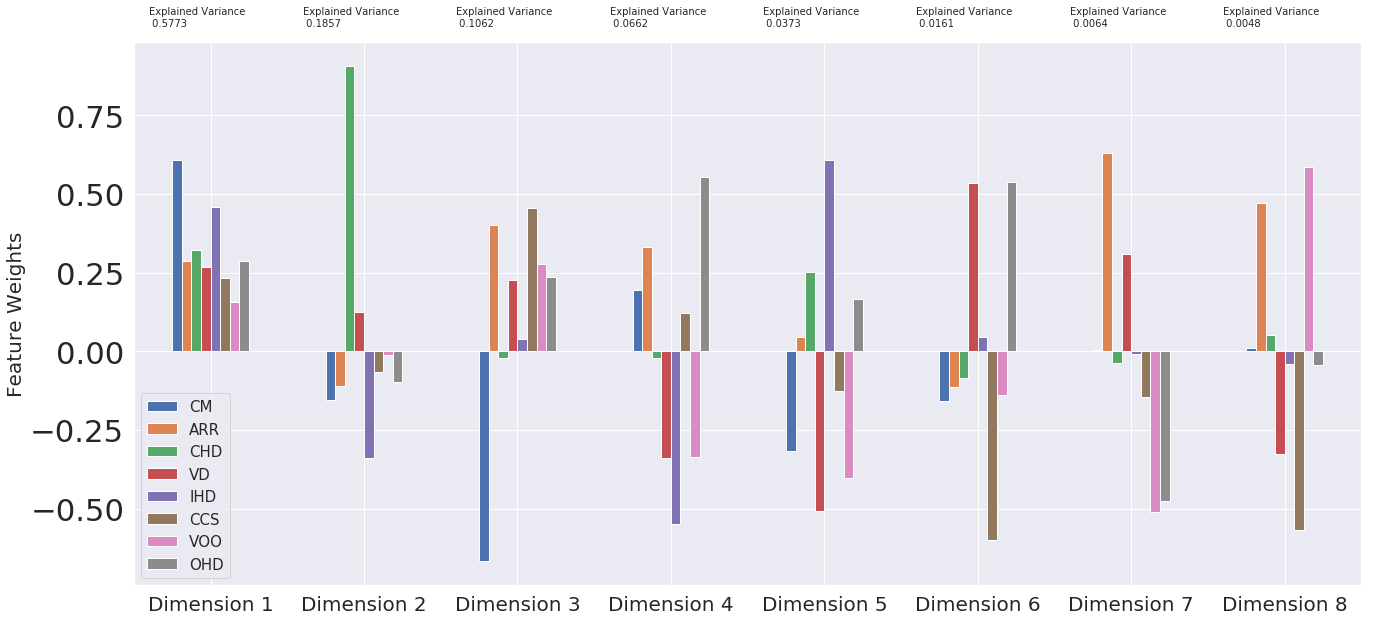

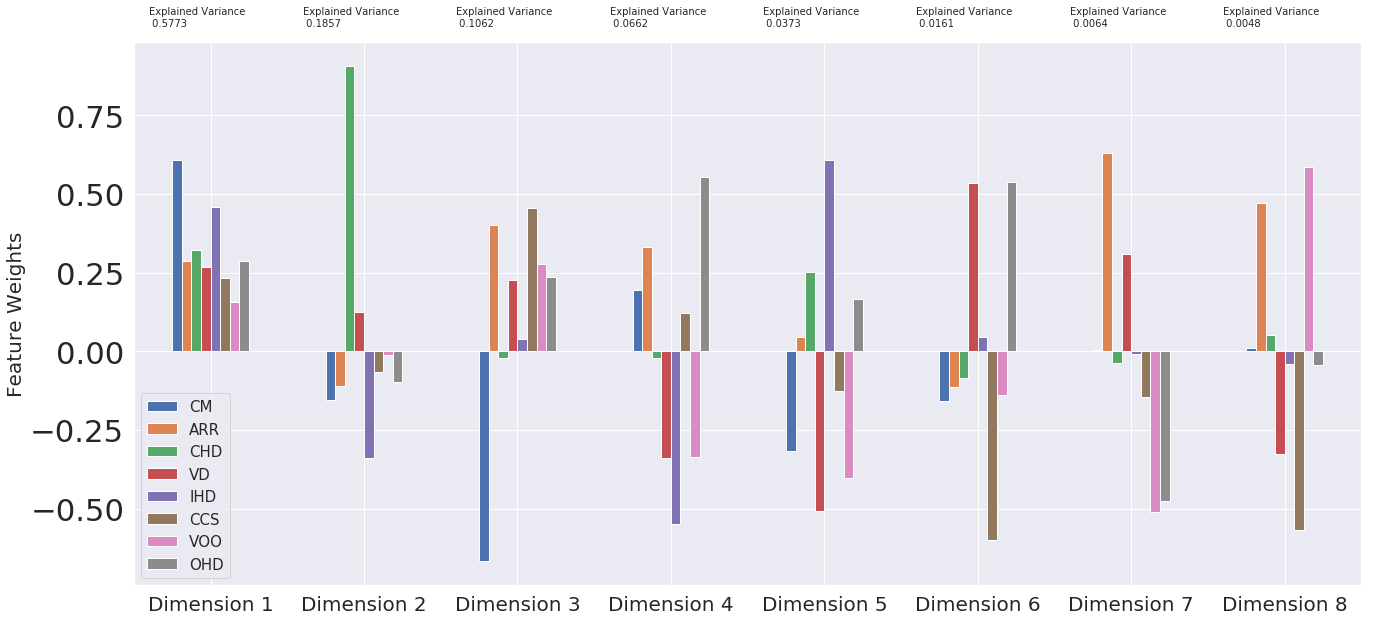

In [42]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(wt_data)


# Generate PCA results plot
pca_results(wt_data, pca, fname = 'plots/pca-cvd-weights.pdf')
pca_results(wt_data, pca, fname = 'plots/pca-cvd-weights.png')

In [43]:
pca_results

<function __main__.pca_results>

In [44]:
pca.components_

array([[ 0.60855664,  0.28705927,  0.32341661,  0.26776788,  0.45839427,
         0.2330909 ,  0.15697401,  0.28611245],
       [-0.15568748, -0.1099606 ,  0.90525506,  0.12466242, -0.33934672,
        -0.06410507, -0.01177462, -0.09611624],
       [-0.66494807,  0.40283775, -0.02132954,  0.22632066,  0.03759291,
         0.45676352,  0.27836776,  0.23739223],
       [ 0.19606897,  0.3310345 , -0.02121387, -0.34049508, -0.54760981,
         0.12185921, -0.33517413,  0.55544426],
       [-0.31571782,  0.04447983,  0.25255474, -0.50802572,  0.60811846,
        -0.12597474, -0.40373283,  0.16670895],
       [-0.15818109, -0.11234821, -0.08502227,  0.53485853,  0.04414353,
        -0.59844501, -0.13949351,  0.53806196],
       [ 0.00409008,  0.62974003, -0.0363255 ,  0.30901683, -0.00972323,
        -0.14605604, -0.51024497, -0.47415503],
       [ 0.01027272,  0.47166775,  0.05174712, -0.32549428, -0.03971788,
        -0.56810049,  0.58530474, -0.04361649]])

----------

### PCA: Biplot

In [45]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'orange'
        elif mx == col[2]:
            grp = 'green'
        elif mx == col[3]:
            grp = 'red'
        elif mx == col[4]:
            grp = 'purple'
        elif mx == col[5]:
            grp = 'brown'
        elif mx == col[6]:
            grp = "pink"
        elif mx == col[7]:
            grp = "grey"
    clrs.append(grp)

In [46]:
pdata = ndf.copy(deep = True)
ppdata = ndf.copy(deep = True)

In [47]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(pdata)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(ppdata)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [48]:
def biplot(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey"]
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    
    
    feature_vectors = pca.components_.T

    
    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                  head_width=0.005, head_length=0.005, linewidth=2, color= clc[i])
        
        ax.text(v[0]*tpos+ 0.018, v[1]*tpos-0.028, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=20)
        
    plt.axis([-0.1, 0.4, -0.3, 0.6])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

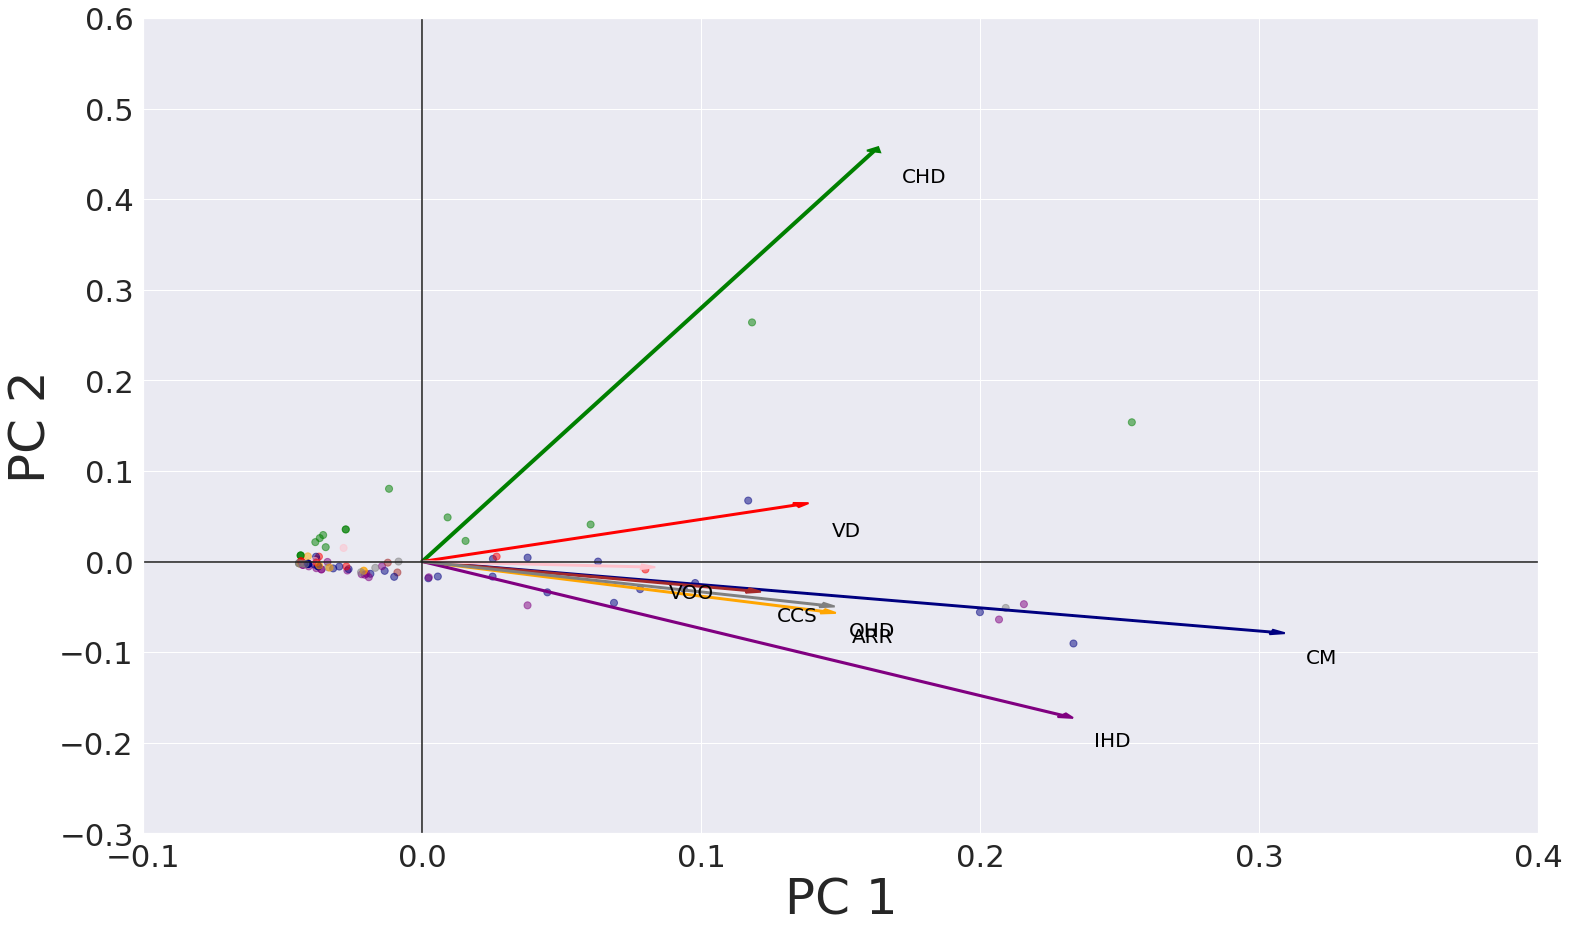

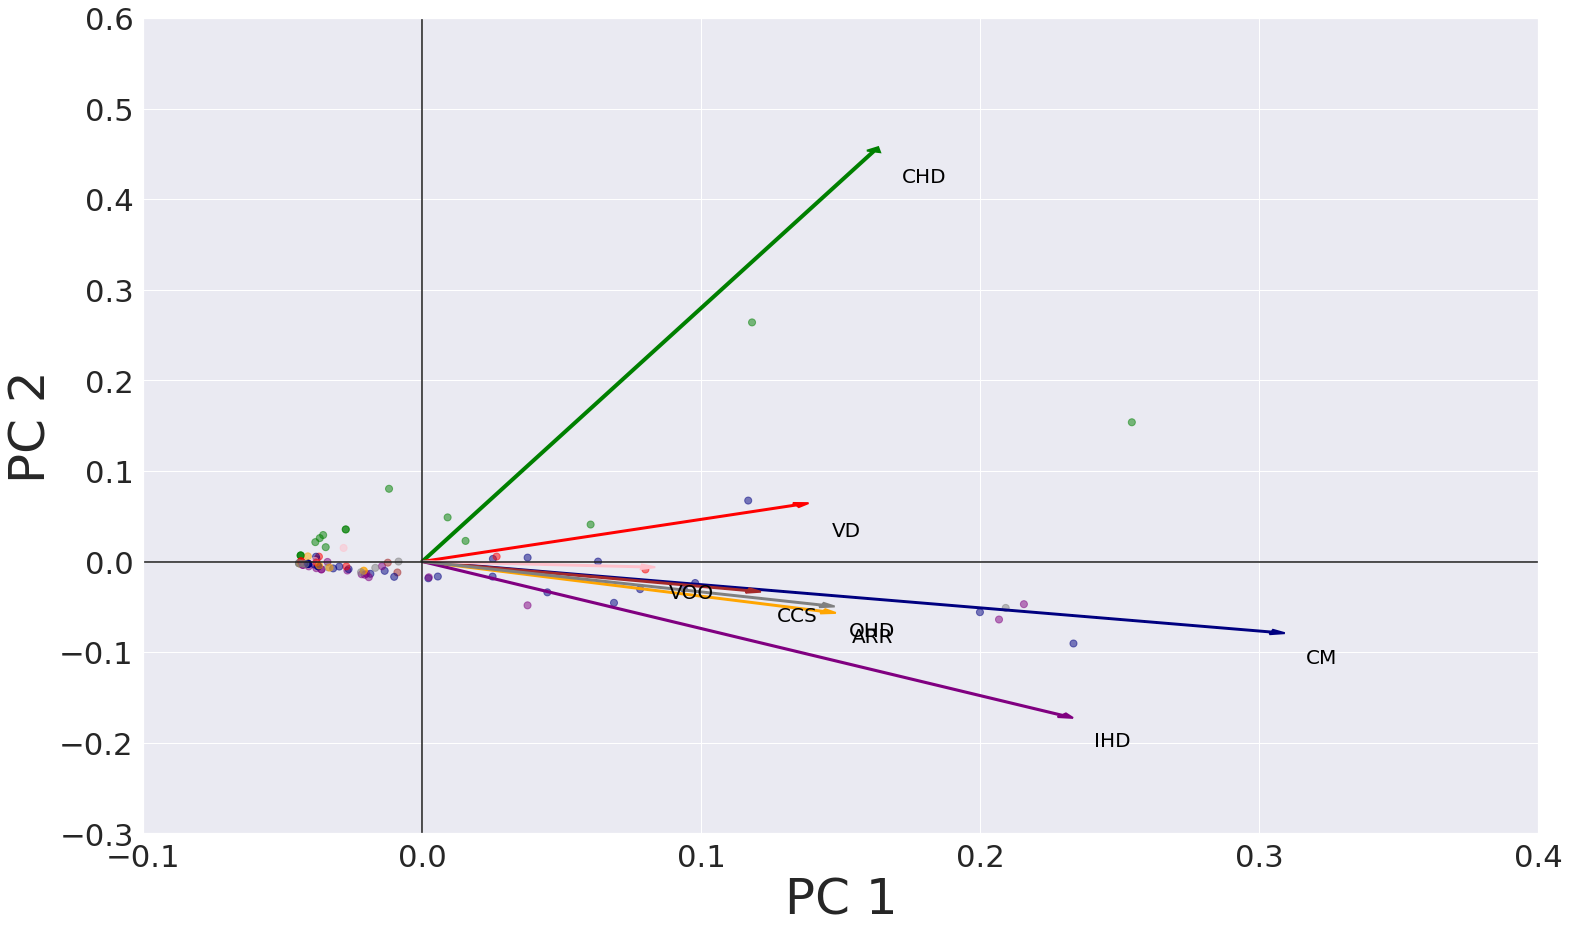

In [49]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot(newdata, reduced_data, pca,'plots/protein-biplot.pdf',clrs)
biplot(newdata, reduced_data, pca,'plots/protein-biplot.png',clrs)